<a href="https://colab.research.google.com/github/Kumarinishu/Nishu-Kumari-Machine-Learning-Intern-YBI/blob/main/Thyroid_Disease_Prediction_Nishu_Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: **NISHU KUMARI**
# YBI FOUNDATION '**MACHINE LEARNING INTERN**'
#### Batch: 18th July
### Project7: Thyroid Disease Prediction
### Dataset Link:https://www.dropbox.com/s/dut0pljmwr9do2l/ThyroidDisease.csv?dl=1

### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the dataset

In [6]:
df=pd.read_csv('/content/sample_data/ThyroidDisease.csv')
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [7]:
df.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,P
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,P
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,P
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,P
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,P


In [8]:
df.shape

(3772, 30)

In [9]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [11]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [12]:
df.nunique().sum()

1126

In [13]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [14]:
df["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [15]:

df["binaryClass"]=df["binaryClass"].map({"N":0,"P":1})

In [16]:
df["pregnant"].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [17]:
df=df.replace({"t":1,"f":0})

In [18]:

df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,1
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,1
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,1
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,1
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,?,0,?,0,?,0,?,other,1
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,?,SVI,1
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,?,other,1
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,?,SVI,1


In [19]:
df['sex'].isnull().sum()

0

In [20]:

df["TBG"].value_counts()

?    3772
Name: TBG, dtype: int64

In [21]:

del df["TBG"]

In [22]:
df=df.replace({"?":np.NAN})

In [23]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [24]:
df["sex"].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [25]:
df=df.replace({"F":1,"M":0})

In [26]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,1.0,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,SVHC,1
1,23,1.0,0,0,0,0,0,0,0,0,...,2,1,102,0,NaN,0,NaN,0,other,1
2,46,0.0,0,0,0,0,0,0,0,0,...,NaN,1,109,1,0.91,1,120,0,other,1
3,70,1.0,1,0,0,0,0,0,0,0,...,1.9,1,175,0,NaN,0,NaN,0,other,1
4,70,1.0,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,SVI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1.0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,0,NaN,0,other,1
3768,68,1.0,0,0,0,0,0,0,0,0,...,2.1,1,124,1,1.08,1,114,0,SVI,1
3769,74,1.0,0,0,0,0,0,0,0,0,...,1.8,1,112,1,1.07,1,105,0,other,1
3770,72,0.0,0,0,0,0,0,0,0,0,...,2,1,82,1,0.94,1,87,0,SVI,1


In [27]:
df["referral source"].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [28]:
del df["referral source"]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [30]:
df["T3 measured"].value_counts()

1    3003
0     769
Name: T3 measured, dtype: int64

In [31]:
df["TT4 measured"].value_counts()

1    3541
0     231
Name: TT4 measured, dtype: int64

In [32]:
df["FTI measured"].value_counts()

1    3387
0     385
Name: FTI measured, dtype: int64

In [33]:
df["TBG measured"].value_counts()

0    3772
Name: TBG measured, dtype: int64

In [34]:
df["binaryClass"].value_counts()

1    3481
0     291
Name: binaryClass, dtype: int64

In [35]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
b

In [36]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [37]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [38]:
df['T4U measured'].mean()

0.8974019088016967

In [39]:
df['T4U measured'].fillna(df['T4U measured'].mean(), inplace=True)

In [40]:
df['sex'].fillna(df['sex'].mean(), inplace=True)

In [41]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [43]:
df['TSH'] = imputer.fit_transform(df[['TSH']])

In [44]:

df['T3'] = imputer.fit_transform(df[['T3']])

In [45]:
df['TT4'] = imputer.fit_transform(df[['TT4']])

In [46]:
df['T4U'] = imputer.fit_transform(df[['T4U']])

In [47]:
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [48]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [49]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.000000,1,1.140,1,109.000000,0,1
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.000000,0,0.995,0,110.469649,0,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.000000,1,0.910,1,120.000000,0,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.000000,0,0.995,0,110.469649,0,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.000000,1,0.870,1,70.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,0,1
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1,2.1000,1,124.000000,1,1.080,1,114.000000,0,1
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,1,1.8000,1,112.000000,1,1.070,1,105.000000,0,1
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,82.000000,1,0.940,1,87.000000,0,1


In [50]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

In [51]:
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


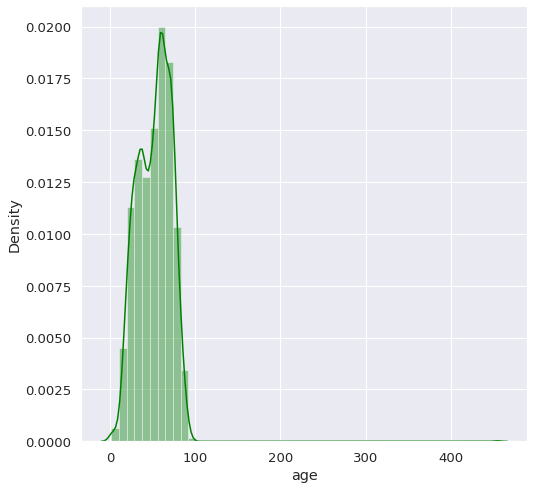

In [52]:
sns.distplot(df['age'],color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


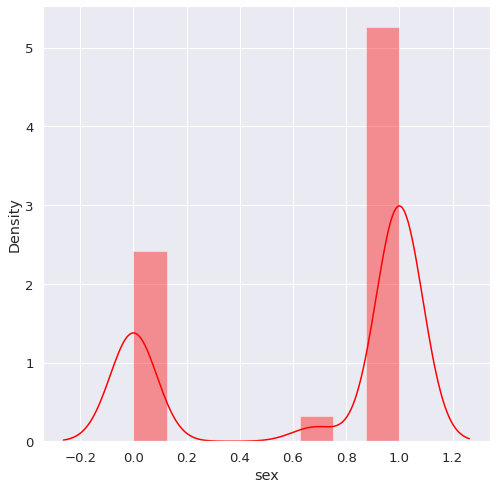

In [53]:
sns.distplot(df['sex'],color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


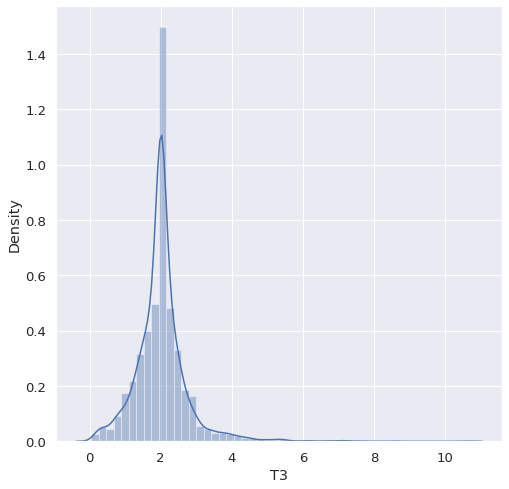

In [54]:
sns.distplot(df['T3'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


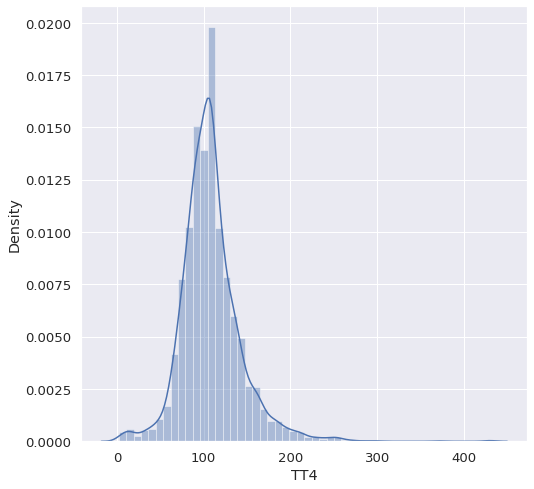

In [55]:
sns.distplot(df['TT4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


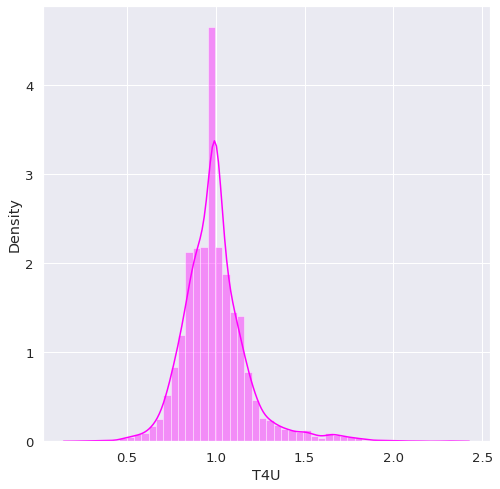

In [56]:
sns.distplot(df['T4U'],color='magenta')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


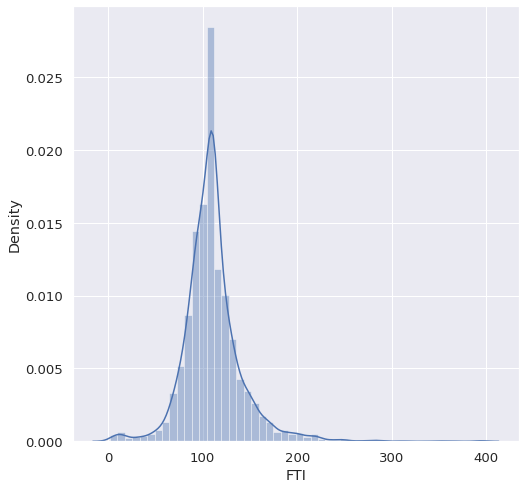

In [57]:
sns.distplot(df['FTI'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


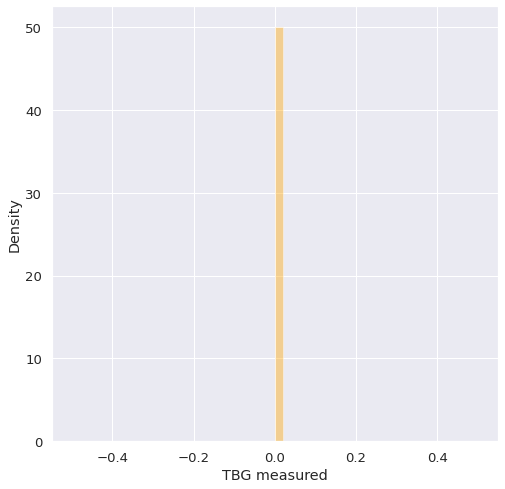

In [58]:
sns.distplot(df['TBG measured'],color='orange')

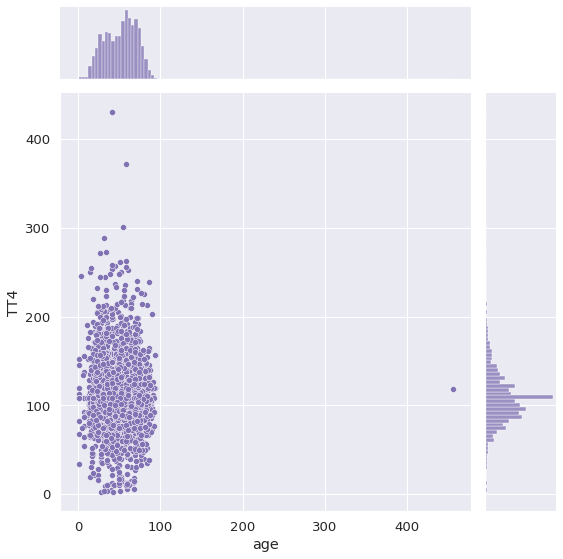

In [59]:
sns.jointplot(x='age', y='TT4', data=df, kind='scatter', height=8, color='m')

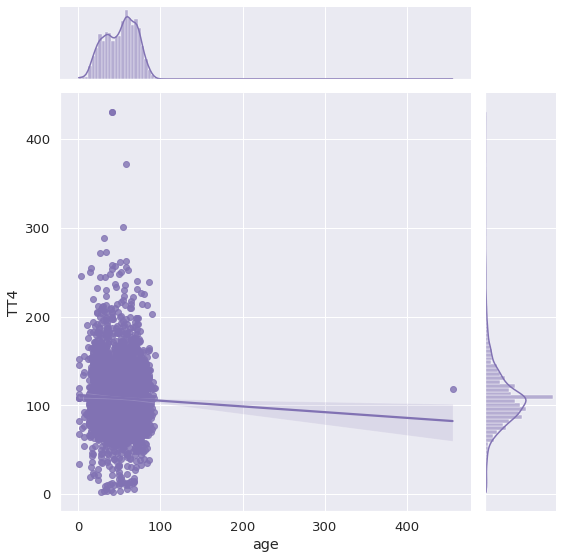

In [60]:
sns.jointplot(x='age', y='TT4', data=df, kind='reg', height=8, color='m')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


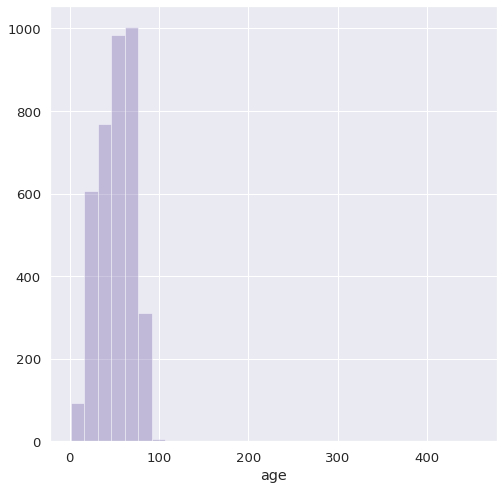

In [61]:
sns.distplot(df['age'], kde=False, bins=30, color='m')

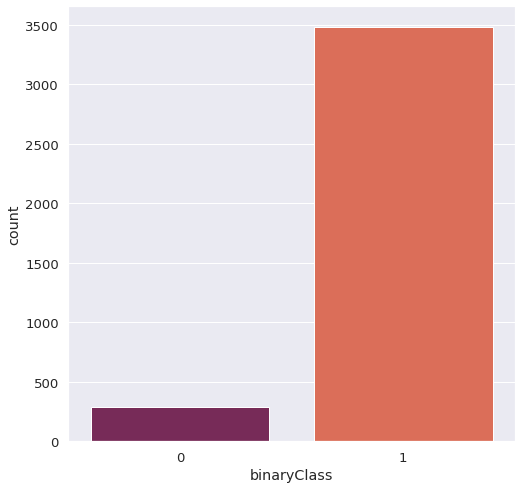

In [62]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

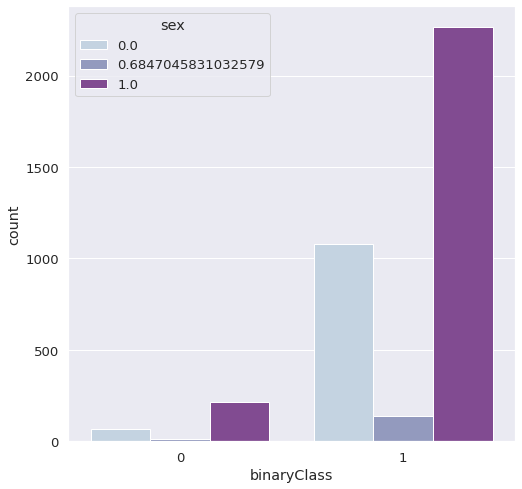

In [63]:
sns.countplot(x='binaryClass', data=df, hue='sex', palette='BuPu')

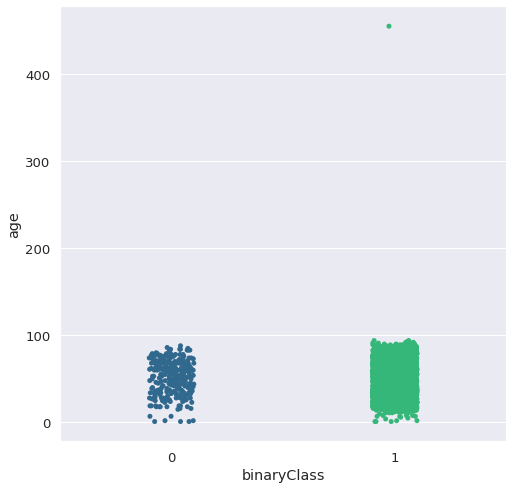

In [64]:
sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")

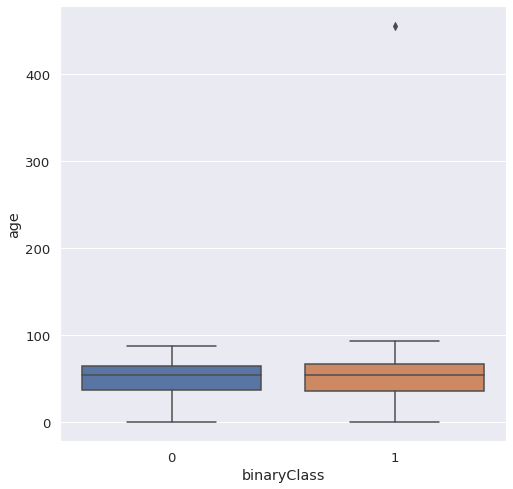

In [65]:
sns.boxplot(x='binaryClass', y='age', data=df)

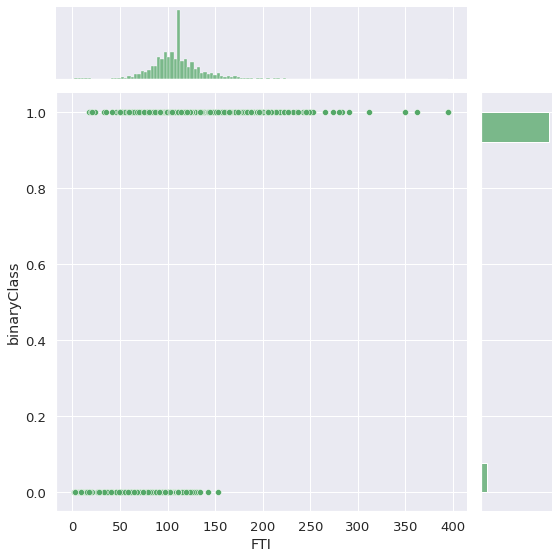

In [66]:
sns.jointplot(x='FTI', y='binaryClass', data=df, kind='scatter', height=8, color='g')

In [67]:
df_corr = df.corr()
df_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,0.003606,0.014563,-0.017870,-0.063881,0.079468,-0.113521,-0.029502,0.052704,0.039562,...,7.311084e-02,-2.149247e-01,6.750898e-02,-3.760948e-02,8.536127e-02,-1.575229e-01,8.453378e-02,5.001749e-02,NaN,0.003174
sex,0.003606,1.000000,0.098510,-0.043533,0.030484,-0.005755,0.079550,0.036586,0.020372,0.046353,...,-7.500437e-02,6.275929e-02,-7.387180e-02,1.669887e-01,-4.934307e-02,2.255718e-01,-5.016697e-02,3.853089e-02,NaN,-0.050808
on thyroxine,0.014563,0.098510,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-1.450614e-01,6.484854e-03,2.496392e-02,2.128008e-01,3.885187e-02,4.636815e-02,3.828521e-02,1.857484e-01,NaN,0.081060
query on thyroxine,-0.017870,-0.043533,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-3.340948e-02,-6.465900e-03,2.960328e-02,-4.702231e-03,3.155031e-02,4.384229e-04,3.141982e-02,-3.550040e-03,NaN,0.007448
on antithyroid medication,-0.063881,0.030484,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,1.094961e-02,7.921225e-02,-2.464939e-02,2.381055e-02,-2.953201e-02,6.036462e-02,-2.978795e-02,-1.660334e-02,NaN,0.021689
sick,0.079468,-0.005755,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,6.695144e-03,-7.647155e-02,-5.699708e-03,-3.700575e-02,9.399140e-03,-3.906941e-02,9.068046e-03,-2.118940e-02,NaN,0.001749
pregnant,-0.113521,0.079550,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,2.686496e-02,1.811466e-01,2.109671e-02,1.724903e-01,3.294152e-02,3.347023e-01,3.280814e-02,-1.669842e-02,NaN,0.034516
thyroid surgery,-0.029502,0.036586,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-2.345292e-02,-2.414553e-02,3.049073e-02,-2.180623e-02,1.067220e-02,2.792243e-02,1.048764e-02,-3.182840e-02,NaN,0.017633
I131 treatment,0.052704,0.020372,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,1.504369e-04,1.205665e-02,3.219634e-02,-8.848056e-03,2.854012e-02,9.405826e-03,2.838493e-02,-1.681719e-02,NaN,-0.003590
query hypothyroid,0.039562,0.046353,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-6.354673e-02,-4.749603e-02,2.443261e-02,-9.012716e-03,1.451686e-02,1.383247e-02,1.409980e-02,-1.971919e-02,NaN,-0.086282


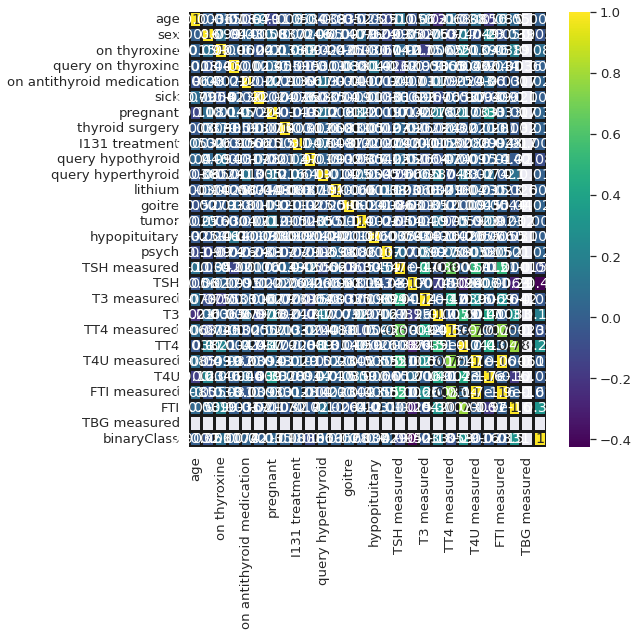

In [68]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)

In [69]:
X = df.drop('binaryClass', axis=1)
y = df['binaryClass']

In [70]:
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000,0


In [71]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: binaryClass, Length: 3772, dtype: int64

In [72]:
X.shape

(3772, 27)

In [73]:
y.shape

(3772,)

In [74]:
import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            binaryClass   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     48.57
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.41e-213
Time:                        05:29:49   Log-Likelihood:                 179.17
No. Observations:                3772   AIC:                            -304.3
Df Residuals:                    3745   BIC:                            -136.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9666      0.058     16.730      0.000       0.853       1.080
age                        4.813e-05      0.000      0.242      0.809      -0.000       0.000
sex                          -0.0343      0.009     -3.943      0.000      -0.051      -0.017
on thyroxine                  0.0530      0.012      4.339      0.000       0.029       0.077
query on thyroxine           -0.0377      0.034     -1.109      0.268      -0.104       0.029
on antithyroid medication     0.0469      0.036      1.299      0.194      -0.024       0.118
sick                          0.0130      0.020      0.660      0.509      -0.026       0.052
pregnant                      0.0573      0.035      1.654      0.098      -0.011       0.125
thyroid surgery               0.0964      0.032      2.989      0.003       0.033       0.160
I131 treatment                0.0086      0.031      0.279      0.780      -0.052       0.069
query hypothyroid            -0.0718      0.016     -4.520      0.000      -0.103      -0.041
query hyperthyroid           -0.0258      0.016     -1.593      0.111      -0.057       0.006
lithium                       0.0436      0.055      0.794      0.427      -0.064       0.151
goitre                        0.0680      0.040      1.693      0.091      -0.011       0.147
tumor                        -0.0327      0.024     -1.344      0.179      -0.080       0.015
hypopituitary                 0.2020      0.234      0.862      0.389      -0.257       0.661
psych                         0.0225      0.018      1.258      0.208      -0.013       0.058
TSH measured                 -0.1060      0.018     -5.802      0.000      -0.142      -0.070
TSH                          -0.0040      0.000    -22.821      0.000      -0.004      -0.004
T3 measured                   0.0199      0.011      1.808      0.071      -0.002       0.041
T3                            0.0216      0.006      3.348      0.001       0.009       0.034
TT4 measured                 -0.0202      0.029     -0.704      0.481      -0.077       0.036
TT4                           0.0016      0.000      3.641      0.000       0.001       0.002
T4U measured                 -0.1140      0.165     -0.691      0.490      -0.437       0.209
T4U                          -0.1602      0.055     -2.920      0.004      -0.268      -0.053
FTI measured                  0.1421      0.165      0.863      0.388      -0.181       0.465
FTI                        5.955e-05      0.000      0.133      0.894      -0.001       0.001
TBG measured                       0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2079.207   Durbin-Watson:                   2.009
Prob(Omnibu

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=46789)

In [76]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2640, 28), (1132, 28), (2640,), (1132,))

In [77]:
X.shape

(3772, 28)

In [78]:
X.shape[1]

28

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [81]:
model = Sequential()
model.add(Dense(256, input_shape=[X.shape[1]], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7424      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 63)                8127      
                                                                 
 dropout_2 (Dropout)         (None, 63)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [83]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [85]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)

Epoch 1/100
38/38 [==============================] - 1s 10ms/step - loss: 0.3191 - accuracy: 0.9087 - val_loss: 0.1765 - val_accuracy: 0.9356 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1863 - accuracy: 0.9419 - val_loss: 0.1246 - val_accuracy: 0.9545 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1443 - accuracy: 0.9529 - val_loss: 0.1063 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1388 - accuracy: 0.9529 - val_loss: 0.1002 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1138 - accuracy: 0.9596 - val_loss: 0.0923 - val_accuracy: 0.9697 - lr: 0.0010
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1057 - accuracy: 0.9600 - val_loss: 0.0786 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.

In [86]:
model.evaluate(x_test, y_test)

36/36 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9867


[0.08155098557472229, 0.9867491126060486]

In [87]:
y_pred = model.predict(x_test)
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [88]:
y_pred[1]

array([1.], dtype=float32)

In [89]:
y_test

2964    1
416     1
2128    1
1545    1
40      0
       ..
913     1
829     1
3025    1
1253    1
1901    1
Name: binaryClass, Length: 1132, dtype: int64

In [90]:
%%time
model.evaluate(x_test, y_test)

36/36 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9867
CPU times: user 375 ms, sys: 6.51 ms, total: 381 ms
Wall time: 446 ms


[0.08155098557472229, 0.9867491126060486]

In [91]:
model.predict(x_test)[1]

array([1.], dtype=float32)

In [92]:
model.predict(x_test)[1]

array([1.], dtype=float32)

In [93]:
y_test.iloc[1]

1

In [94]:
model.predict(x_test)[70]

array([0.99999976], dtype=float32)

In [95]:
y_test.iloc[70]

1

In [96]:
model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[1.]], dtype=float32)

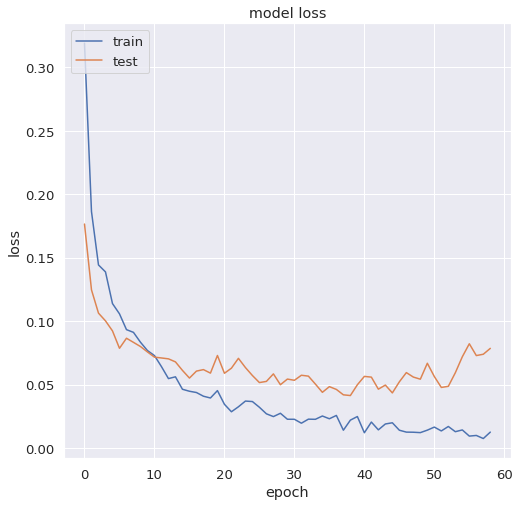

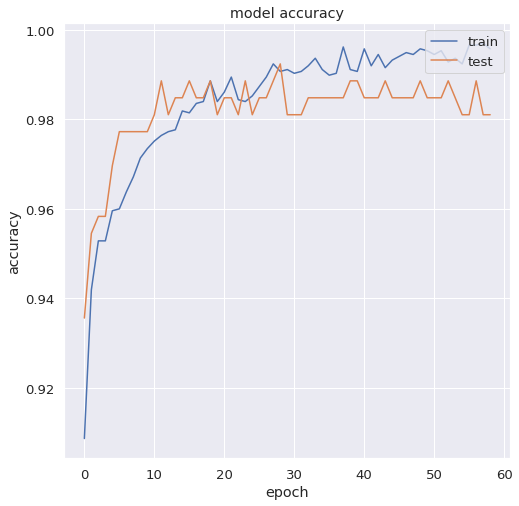

In [97]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Hence, the accuracy of the model is approx 98%

# **THANK YOU......))**